In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from colossus.halo.mass_so import R_to_M, M_to_R
from colossus.cosmology.cosmology import setCosmology,addCosmology
from colossus.halo.profile_nfw import NFWProfile
from scipy.optimize import brentq, bisect

In [2]:
params = {'flat': True, 'H0': 67.2, 'Om0': 0.3, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95}
addCosmology('myCosmo', params)
cosmo = setCosmology('myCosmo')

In [3]:

emf = np.genfromtxt('UniversalFit/RESULTS/ESMF_M1423_z050.dat')
umf = np.genfromtxt('UniversalFit/RESULTS/USMF_M1423_z050.dat')

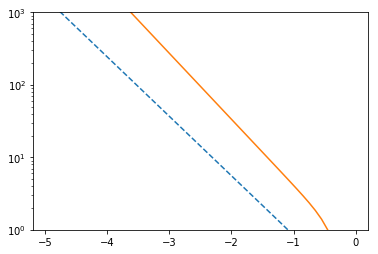

In [4]:
plt.plot(emf[:,0], emf[:,1], '--')
plt.plot(umf[:,0], umf[:,1])
# plt.xscale('log')
plt.yscale('log')
plt.ylim([1,1000])
plt.show()

In [5]:
abma = np.interp(emf[::-1,1], umf[::-1,1], umf[::1,0], left=np.nan,right=np.nan)
print(abma)

[        nan         nan         nan -4.91554745 -4.82527024 -4.76500305
 -4.72247134 -4.68661732 -4.64901313 -4.61234249 -4.56929168 -4.52030291
 -4.46310815 -4.39910434 -4.32649833 -4.24667724 -4.16417599 -4.07889876
 -3.99149264 -3.90275811 -3.8132014  -3.72310748 -3.63264934 -3.54192698
 -3.4511359  -3.36197762 -3.27259872 -3.18300151 -3.09318062 -3.00314546
 -2.91290397 -2.82247028 -2.73183405 -2.64100591 -2.54999002 -2.46083321
 -2.37145749 -2.28187787 -2.19207723 -2.1020406  -2.01182805 -1.92141437
 -1.83080157 -1.73998879 -1.6490003  -1.55964102 -1.47029359 -1.38073781
 -1.29095315 -1.20096626]


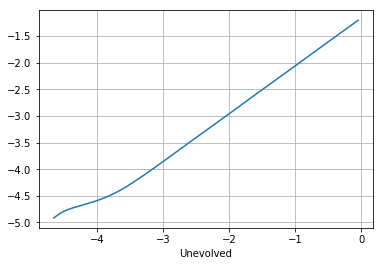

In [6]:
plt.plot(emf[:,0], abma)
plt.xlabel('Evolved')
plt.xlabel('Unevolved')
plt.grid()
plt.show()

In [26]:
M=1e11
z = 0.5
c = 10
profile = NFWProfile(M=M, mdef = 'vir', z = z, c = c)
Rvir = profile.RDelta(z, 'vir')
print('Colossus: ', profile.enclosedMass(Rvir/c)/M)

Colossus:  0.129733083317
